In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn import metrics

# EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [2]:
df = pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
# Get the information about each column as their data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [6]:
df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [7]:
# Drop all the columns containing ?

In [8]:
df = df[(df != '?').all(axis=1)]

In [9]:
# 6 rows have been dropped as they contain a ?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.6+ KB


In [11]:
# convert the Hp data type to float.

In [12]:
df['hp'] = df.hp.astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [14]:
# Convert car name to category.

In [15]:
df['car name'] = df['car name'].astype('category')
df['car name'] = df['car name'].cat.codes
df['car name'].head()

0     48
1     35
2    229
3     13
4    159
Name: car name, dtype: int16

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null int16
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int16(1), int64(3)
memory usage: 25.3 KB


Use pair plot or scatter matrix to visualize how the different variables are related

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D452B0D9B0>,
      dtype=object)

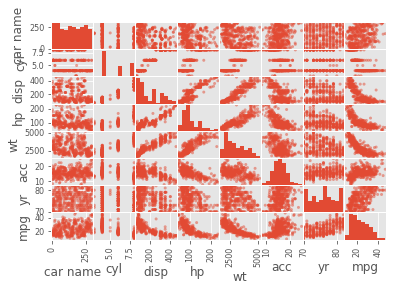

In [17]:
#print the scatter_matrix of the data frame.
scatter_matrix(df)

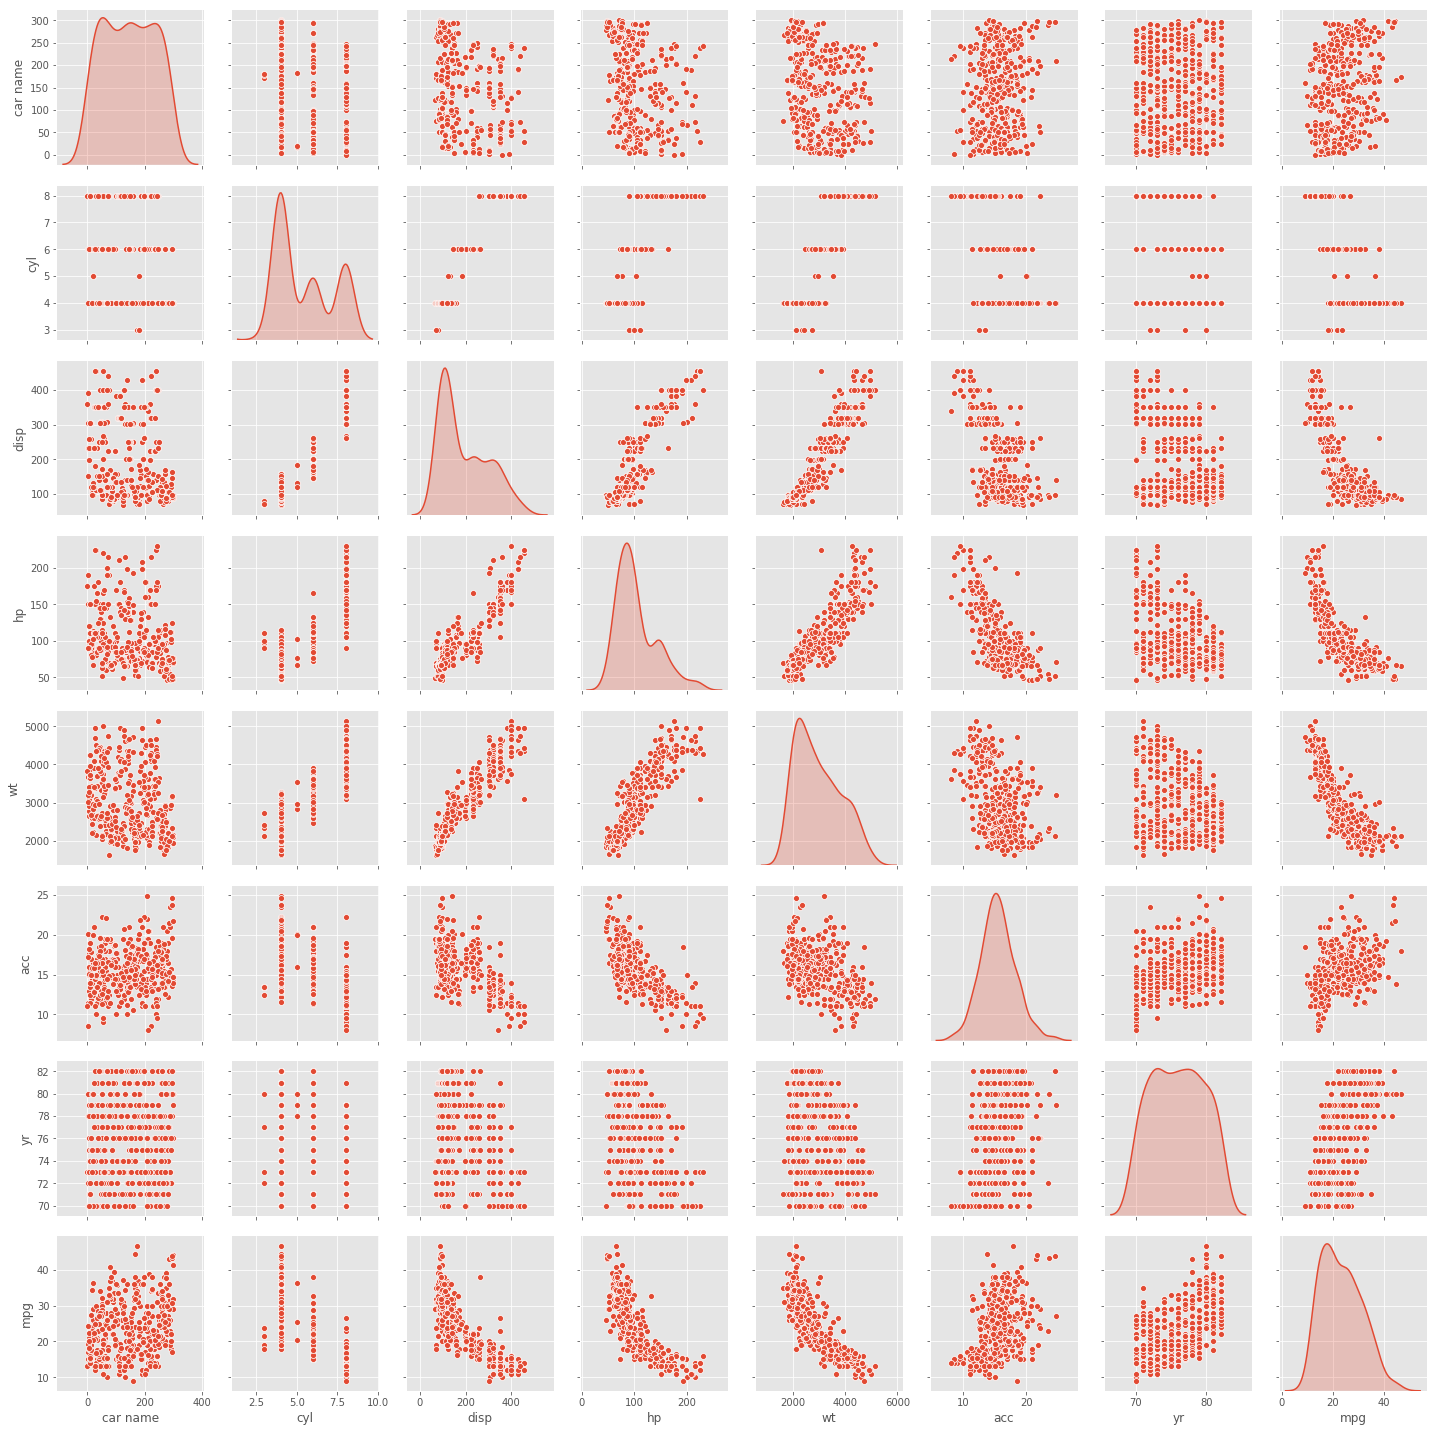

In [18]:
# keeping status as the label to be predicted draw the graph.
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [19]:
# standardize the data using z scores

In [20]:
from scipy.stats import zscore
df_std = df.apply(zscore)
df_std.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925


Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [21]:
# Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error

In [22]:
cluster_range = range( 1, 11)  
distortion=[]
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_std)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    distortion.append(clusters.inertia_ )        # capture the intertia
    
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Distortion": distortion } )
clusters_df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,num_clusters,Distortion
0,1,3136.000000
1,2,1635.666718
2,3,1281.659104
3,4,1073.383789
4,5,999.962176
5,6,905.531608
6,7,834.351360
7,8,786.692565
8,9,721.143452
9,10,691.828405


In [23]:
#Use Matplotlib to plot the scree/elbow plot

<Figure size 864x432 with 0 Axes>

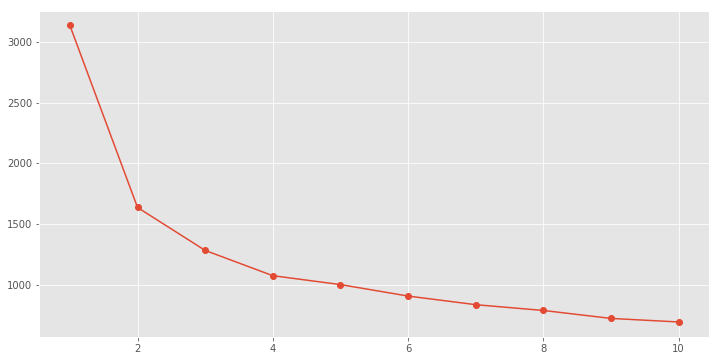

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Distortion, marker = "o" )
plt.show()

In [25]:
# considering Optimal value of K to be 4

In [26]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(df_std)
# Getting the cluster labels
labels = kmeans.predict(df_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [27]:
# Comparing with scikit-learn centroids
print(centroids) # From sci-kit learn

[[-0.31466144  1.48394702  1.48913886  1.50679413  1.39145217 -1.0759934
  -0.68265368 -1.1566489 ]
 [ 0.20947625 -0.8307877  -0.79857243 -0.77861783 -0.7960579   0.41880685
   1.12612405  1.2210618 ]
 [ 0.4620153  -0.81370011 -0.78121688 -0.52999668 -0.7344652   0.26947027
  -0.6157338   0.200834  ]
 [-0.47284959  0.39093089  0.30686664 -0.03971848  0.35292505  0.32707443
   0.10864765 -0.48040371]]


In [28]:
# Storing the centroids in a dataframe with column names from the original dataset given

In [29]:
centroids_df = pd.DataFrame(centroids, columns = df_std.columns)
centroids_df

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,-0.314661,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-1.156649
1,0.209476,-0.830788,-0.798572,-0.778618,-0.796058,0.418807,1.126124,1.221062
2,0.462015,-0.813700,-0.781217,-0.529997,-0.734465,0.269470,-0.615734,0.200834
3,-0.472850,0.390931,0.306867,-0.039718,0.352925,0.327074,0.108648,-0.480404


In [30]:
# printing the labels of the classes

In [31]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 3, 3, 3, 2, 2, 2, 2, 3,
       3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 1, 2, 2, 1, 3,
       3, 3, 3, 2, 1, 2, 2, 2, 0, 2, 2, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0,
       3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 2,
       1, 1, 1, 1, 1, 3, 0, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 3, 3, 0, 0,
       3, 0, 0, 3, 0, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1,

In [32]:
prediction= kmeans.predict(df_std)

In [33]:
df_car_pred = pd.DataFrame(df_std)

In [34]:
df_car_pred["group"] = prediction

In [35]:
df_car_pred.head(20)

,car name,cyl,disp,hp,wt,acc,yr,mpg,group
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,0
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,0
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,0
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,0
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,0
5,-0.073925,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-1.083498,0
6,-1.056822,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-1.211785,0
7,0.841187,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-1.211785,0
8,1.044545,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-1.211785,0
9,-1.644302,1.483947,1.871469,2.224924,1.028406,-2.555517,-1.625315,-1.083498,0


In [36]:
df_car_pred.groupby("group").count()

,car name,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,,
0,94,94,94,94,94,94,94,94
1,106,106,106,106,106,106,106,106
2,105,105,105,105,105,105,105,105
3,87,87,87,87,87,87,87,87


In [37]:
# Generating a new dataset using make_blobs function and plotting the same.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 3 clusters
X, y = make_blobs(n_samples=392, n_features=8, centers=4)

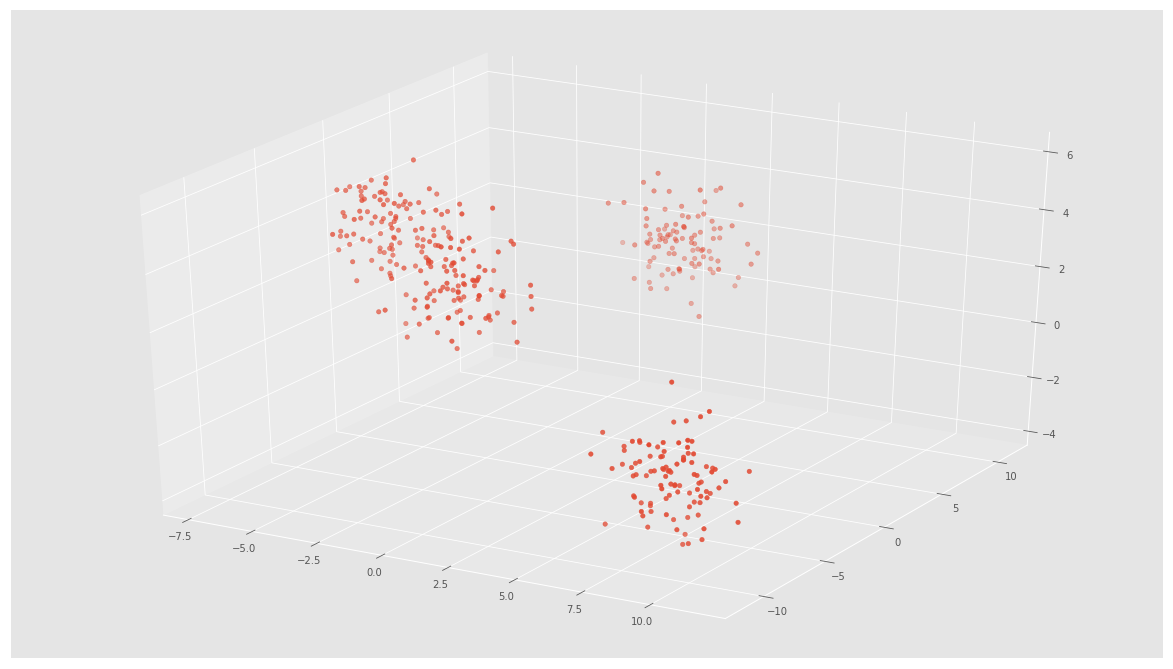

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [40]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

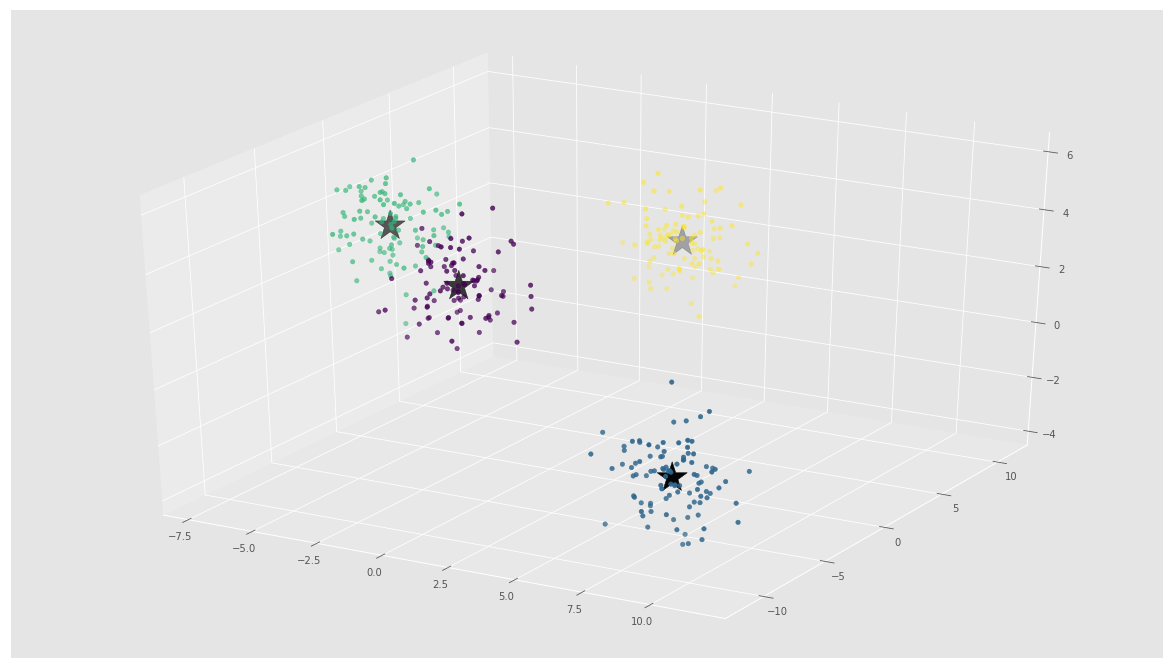

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [42]:
df_car_pred_0 = df_car_pred.loc[df_car_pred["group"] == 0]
df_car_pred_1 = df_car_pred.loc[df_car_pred["group"] == 1]
df_car_pred_2 = df_car_pred.loc[df_car_pred["group"] == 2]
df_car_pred_3 = df_car_pred.loc[df_car_pred["group"] == 3]

Use linear regression model on different clusters separately and print the coefficients of the models individually

In [43]:
x0=df_car_pred_0.drop(["mpg"], axis=1)
y0=df_car_pred_0["mpg"]

x1=df_car_pred_1.drop(["mpg"], axis=1)
y1=df_car_pred_1["mpg"]

x2=df_car_pred_2.drop(["mpg"], axis=1)
y2=df_car_pred_2["mpg"]

x3=df_car_pred_3.drop(["mpg"], axis=1)
y3=df_car_pred_3["mpg"]

In [44]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.30, random_state=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=1)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression

regression_model0 = LinearRegression()
regression_model0.fit(x0_train, y0_train)

regression_model1 = LinearRegression()
regression_model1.fit(x1_train, y1_train)

regression_model2 = LinearRegression()
regression_model2.fit(x2_train, y2_train)

regression_model3 = LinearRegression()
regression_model3.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Train R^2
print(regression_model0.score(x0_train, y0_train))
print(regression_model1.score(x1_train, y1_train))
print(regression_model2.score(x2_train, y2_train))
print(regression_model3.score(x3_train, y3_train))

0.6401913347015439
0.46183083771486644
0.49686426654587346
0.572173320103046


In [47]:
# Test R^2
print(regression_model0.score(x0_test, y0_test))
print(regression_model1.score(x1_test, y1_test))
print(regression_model2.score(x2_test, y2_test))
print(regression_model3.score(x3_test, y3_test))

0.27188200588872957
0.5291127361280887
0.6602530226327372
-0.07731305017521639


In [51]:
# Evaluate using Cross Validation
from sklearn import model_selection
seed = 6
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()

results = model_selection.cross_val_score(model, x0, y0, scoring='r2', cv=kfold)
print("R square: %.3f (%.3f)" % (-results.mean(), results.std()))

R square: 0.388 (0.864)


In [52]:
y0_pred = regression_model0.predict(x0_test)

In [53]:
metrics.r2_score(y0_test, y0_pred)

0.27188200588872957